# Final Project: RUSH Business Case Analysis
Class: GEN BUS 885\
Author: Matthew Brown\
Date: 07/29/2025

## Business Scenario
You work as a sales analyst for RUSH, a globally renowned sportswear and footwear brand known for its innovative designs and performance-oriented products. The company stores its raw sales data as a collection of three tables:
+ TABLE_PRODUCTS
+ TABLE_RETAILER
+ TABLE_SALES

The data includes the number of units sold, the total sales revenue, the location of the sales, the type of product sold, as well as other relevant information. (For data field definitions and explanations, see the data dictionary.) The data is "raw," meaning it has not been cleaned and probably contains errors that need to be addressed.

The VP of US Sales has tasked you with analyzing sales data for trends and insights that will help company leadership understand the market and identify opportunities for growth. For example, you may want to look for trends or insights in seasonality, retailers, locations, or sales methods. Take initiative to apply your creativity and curiosity to this data.

In addition, she has asked you to answer the following business questions:
1. What product category (product) had the highest sales (in dollars) in 2021? How much did it sell?
2. What state had the highest sales (in dollars) of women's products in 2021? How much was it?
3. What state had the highest sales (in dollars) of men's products in 2021? How much was it?
4. What retailer purchased the most units in 2021? In 2020?

## Install and Import Necessary Libraries

In [66]:
# Import ncessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import matplotlib.ticker as ticker

In [2]:
# Untruncate output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Load Data and Create DataFrames

In [3]:
# Load the product data from TABLE_PRODUCTS_885.csv into a Dataframe called products_df.
products_df = pd.read_csv('data/TABLE_PRODUCTS_885.csv', sep = '|')

# View the first few rows of products_df
products_df.head()

,PRODUCT_ID,PRODUCT_NAME
0,20,Men's Street Footwear
1,30,Men's Athletic Footwear
2,120,Women's Street Footwear
3,130,Women's Athletic Footwear
4,40,Men's Apparel


In [4]:
# Load the retailer data from TABLE_RETAILER_885.csv into a Dataframe called retailers_df.
retailers_df = pd.read_csv('data/TABLE_RETAILER_885.csv')

# View the first few rows of retailers_df
retailers_df.head()

,RETAILER_ID,RETAILER,REGION,STATE,CITY
0,A00MOHCO,Amazon,Midwest,Ohio,Columbus
1,A00NMAPO,Amazon,Northeast,Maine,Portland
2,A00NMABO,Amazon,Northeast,Massachusetts,Boston
3,A00NNEMA,Amazon,Northeast,New Hampshire,Manchester
4,A00NVEBU,Amazon,Northeast,Vermont,Burlington


In [5]:
# Load the sales data from TABLE_SALES_885.csv into a Dataframe called sales_df.
sales_df = pd.read_csv('data/TABLE_SALES_885.csv')

# View the first few rows of sales_df
sales_df.head()

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.0,1200,0.5,In-store
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.0,1250,0.5,In-store
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.0,1220,0.5,Outlet
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.0,1200,0.5,Outlet
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.0,1220,0.5,Outlet


In [6]:
# Combine sales_df and products_df on the PRODUCT_ID column
sales_products_df = sales_df.merge(products_df, how = 'left', on = 'PRODUCT_ID')

# Combine the sales_products_df and retailers_df on the RETAILER_ID column
rush_sales_df = sales_products_df.merge(retailers_df, how = 'left', on = 'RETAILER_ID')

# View the first few rows of rush_sales_df
rush_sales_df.head()

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
0,1,A00MOHCO,1/1/2020,1,1,2020,20,50.0,1200,0.5,In-store,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
1,7,A00MOHCO,1/7/2020,1,7,2020,20,50.0,1250,0.5,In-store,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
2,13,A00MOHCO,1/25/2020,1,25,2020,20,50.0,1220,0.5,Outlet,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
3,19,A00MOHCO,1/31/2020,1,31,2020,20,50.0,1200,0.5,Outlet,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus
4,25,A00MOHCO,2/6/2020,2,6,2020,20,60.0,1220,0.5,Outlet,Men's Street Footwear,Amazon,Midwest,Ohio,Columbus


## Inspect the Data

### Inspect the DataFrame Characteristics

In [7]:
# Inspect the shape of rush_sales_df
rush_sales_df.shape

(10271, 16)

In [8]:
# Inspect the info of rush_sales_df
rush_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271 entries, 0 to 10270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDER_ID          10271 non-null  int64  
 1   RETAILER_ID       10271 non-null  object 
 2   INVOICE_DATE      10271 non-null  object 
 3   MONTH             10271 non-null  int64  
 4   DAY               10271 non-null  int64  
 5   YEAR              10271 non-null  int64  
 6   PRODUCT_ID        10271 non-null  int64  
 7   PRICE_PER_UNIT    10269 non-null  float64
 8   UNITS_SOLD        10271 non-null  object 
 9   OPERATING_MARGIN  10271 non-null  float64
 10  SALES_METHOD      10271 non-null  object 
 11  PRODUCT_NAME      10271 non-null  object 
 12  RETAILER          10270 non-null  object 
 13  REGION            10270 non-null  object 
 14  STATE             10270 non-null  object 
 15  CITY              10270 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

### Characteristics Check Results
+ The DataFrame has 16 columns with 10,271 rows.
+ No unwanted observations.
+ No unwanted features.
+ The ``INVOICE_DATE`` column is an object, we want to turn that into Date datatype.

In [9]:
# Convert the INVOICE_DATE column to datetime format
rush_sales_df['INVOICE_DATE'] = pd.to_datetime(rush_sales_df['INVOICE_DATE'])

# View the information for the rush_sales_df
rush_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10271 entries, 0 to 10270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDER_ID          10271 non-null  int64         
 1   RETAILER_ID       10271 non-null  object        
 2   INVOICE_DATE      10271 non-null  datetime64[ns]
 3   MONTH             10271 non-null  int64         
 4   DAY               10271 non-null  int64         
 5   YEAR              10271 non-null  int64         
 6   PRODUCT_ID        10271 non-null  int64         
 7   PRICE_PER_UNIT    10269 non-null  float64       
 8   UNITS_SOLD        10271 non-null  object        
 9   OPERATING_MARGIN  10271 non-null  float64       
 10  SALES_METHOD      10271 non-null  object        
 11  PRODUCT_NAME      10271 non-null  object        
 12  RETAILER          10270 non-null  object        
 13  REGION            10270 non-null  object        
 14  STATE             1027

### Identify any Unwanted Observations or Features

+ There are no Unwanted Observations or Features.

### Inspect for Missing Values

In [10]:
# Traditional Null Values Check
rush_sales_df.isnull().sum()

ORDER_ID            0
RETAILER_ID         0
INVOICE_DATE        0
MONTH               0
DAY                 0
YEAR                0
PRODUCT_ID          0
PRICE_PER_UNIT      2
UNITS_SOLD          0
OPERATING_MARGIN    0
SALES_METHOD        0
PRODUCT_NAME        0
RETAILER            1
REGION              1
STATE               1
CITY                1
dtype: int64

There are traditional null values in the following columns:
+ PRICE_PER_PRODUCT: 2
+ RETAILER: 1
+ REGION: 1
+ STATE: 1
+ CITY: 1

In [11]:
# Non-Traditional Categorical Null Values Check
# Identify by viewing unique values in each categorical column

# List of categorical columns to inspect by type
cat_columns = list(rush_sales_df.select_dtypes(include = 'object').columns)

# View unique values in each categorical column
for col in cat_columns:
    unique_values = rush_sales_df[col].dropna().astype(str).unique().tolist()
    unique_values.sort()
    print(f"Unique values in column '{col}':")
    pprint.pprint(unique_values)
    print("\n")

Unique values in column 'RETAILER_ID':
['999999999',
 'A00MOHCO',
 'A00NMABO',
 'A00NMAPO',
 'A00NNEMA',
 'A00NVEBU',
 'A00SALBI',
 'A00SKELO',
 'A00SNOCH',
 'A00WALAN',
 'F00MILCH',
 'F00MIODE',
 'F00MKAWI',
 'F00MMIDE',
 'F00MMIMI',
 'F00MMIST',
 'F00MNEOM',
 'F00MNOFA',
 'F00MSOSI',
 'F00NCOHA',
 'F00NDEWI',
 'F00NMABA',
 'F00NNEMA',
 'F00NNENE',
 'F00NPEPH',
 'F00NRHPR',
 'F00NWECH',
 'F00SFLMI',
 'F00SGEAT',
 'F00SKELO',
 'F00SLONE',
 'F00SMIJA',
 'F00SSOCH',
 'F00STEDA',
 'F00STEKN',
 'F00SVIRI',
 'F00WALAN',
 'F00WARPH',
 'F00WCALO',
 'F00WHAHO',
 'F00WIDBO',
 'F00WWASE',
 'F00WWYCH',
 'K00MKAWI',
 'K00MMIMI',
 'K00MMOBI',
 'K00NDEWI',
 'K00NNEAL',
 'K00NNENE',
 'K00SOKOK',
 'K00WARPH',
 'K00WCALO',
 'K00WCASA',
 'K00WNEAL',
 'K00WWYCH',
 'S00MILCH',
 'S00MMIDE',
 'S00MMOBI',
 'S00MNEOM',
 'S00MNOFA',
 'S00MSOSI',
 'S00NCOHA',
 'S00NMABA',
 'S00NMABO',
 'S00NNENE',
 'S00NRHPR',
 'S00SALBI',
 'S00SFLMI',
 'S00SFLOR',
 'S00SGEAT',
 'S00SMIJA',
 'S00SNOCH',
 'S00SSOCH',
 'S00STEDA'

Some unique null values to address later on are as follows:
+ RETAILER_ID: 999999999
+ UNITS_SOLD: *** and 0

In [12]:
# Non-Traditional Numerical Null Values Check
rush_sales_df.describe()

,ORDER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,OPERATING_MARGIN
count,10271.000000,10271,10271.000000,10271.000000,10271.000000,10271.000000,10269.000000,10271.000000
mean,4970.630903,2021-05-13 12:00:54.678220288,6.456333,14.620290,2020.873235,80.001947,54.575324,0.426380
min,1.000000,2020-01-01 00:00:00,1.000000,1.000000,2020.000000,20.000000,7.000000,0.100000
25%,2568.500000,2021-02-18 00:00:00,3.000000,9.000000,2021.000000,30.000000,35.000000,0.350000
50%,5136.000000,2021-06-05 00:00:00,6.000000,14.000000,2021.000000,120.000000,45.000000,0.420000
75%,7236.000000,2021-09-17 00:00:00,9.000000,20.000000,2021.000000,130.000000,55.000000,0.500000
max,9648.000000,2021-12-31 00:00:00,12.000000,31.000000,2021.000000,140.000000,99999.000000,0.800000
std,2770.737186,NaN,3.461826,7.301233,0.332725,50.671441,986.473924,0.096018


There is one column that has a non-traditional numerical null value.

+ PRICE_PER_UNIT has at least one value of 99999.

### Inspect for Duplicate Values

In [13]:
# Inspect for Duplicate values
duplicate_rows = rush_sales_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


There are no duplicate rows in the dataframe.

### Inspect for Erroneous Values

There was one previously identified erroneous value in the dataframe.
+ SALES_METHOD: Ootlet instead of Outlet.

### Inspect for Outliers

In [14]:
# Use the IQR method to identify outliers
# Write a function to calculate IQR and print rows with values that fall outside the IQR range
def detect_outliers_iqr(df, column):
    # Define Q1
    Q1 = df[column].quantile(0.25)
    # Define Q3
    Q3 = df[column].quantile(0.75)
    # Calculate IQR and define bounds
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    # Count the number of True values (Outliers)
    return outliers.sum()

In [15]:
# Iterate over the numeric columns and identify outliers
for col in rush_sales_df.select_dtypes(include = 'number').columns:
    print(f"Number of outliers in column '{col}': {detect_outliers_iqr(rush_sales_df, col)}")
    print("\n")

Number of outliers in column 'ORDER_ID': 0


Number of outliers in column 'MONTH': 0


Number of outliers in column 'DAY': 0


Number of outliers in column 'YEAR': 1302


Number of outliers in column 'PRODUCT_ID': 0


Number of outliers in column 'PRICE_PER_UNIT': 85


Number of outliers in column 'OPERATING_MARGIN': 31




There are 3 columns that have possible outliers:
+ YEAR
+ PRICE_PER_UNIT
+ OPERATING_MARGIN

In [16]:
# Evaluate outliers in year.
year_outliers = rush_sales_df[(rush_sales_df['YEAR'] > 2021) | (rush_sales_df['YEAR'] < 2020)]

print(year_outliers)

Empty DataFrame
Columns: [ORDER_ID, RETAILER_ID, INVOICE_DATE, MONTH, DAY, YEAR, PRODUCT_ID, PRICE_PER_UNIT, UNITS_SOLD, OPERATING_MARGIN, SALES_METHOD, PRODUCT_NAME, RETAILER, REGION, STATE, CITY]
Index: []


There are no outliers in the year column, all years are 2020 or 2021.

In [17]:
# Evaluate outliers in PRICE_PER_UNIT.
Q1 = rush_sales_df['PRICE_PER_UNIT'].quantile(0.25)
Q3 = rush_sales_df['PRICE_PER_UNIT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rush_sales_df[(rush_sales_df['PRICE_PER_UNIT'] < lower_bound) | 
                         (rush_sales_df['PRICE_PER_UNIT'] > upper_bound)]

outliers.sort_values(by = ['PRICE_PER_UNIT', 'REGION', 'RETAILER_ID', 'PRODUCT_ID'], ascending = False)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
423,2536,F00NNEMA,2021-05-23,5,23,2021,20,99999.0,520,0.40,Online,Men's Street Footwear,Foot Locker,Northeast,New Hampshire,Manchester
8789,1395,F00WHAHO,2021-06-17,6,17,2021,140,110.0,750,0.45,In-store,Women's Apparel,Foot Locker,West,Hawaii,Honolulu
8790,1401,F00WHAHO,2021-07-16,7,16,2021,140,110.0,650,0.45,In-store,Women's Apparel,Foot Locker,West,Hawaii,Honolulu
8885,1971,F00MMIST,2021-06-17,6,17,2021,140,110.0,750,0.35,Online,Women's Apparel,Foot Locker,Midwest,Missouri,St. Louis
8886,1977,F00MMIST,2021-07-16,7,16,2021,140,110.0,650,0.35,Online,Women's Apparel,Foot Locker,Midwest,Missouri,St. Louis
8873,1899,F00MMIST,2021-06-24,6,24,2021,140,105.0,700,0.30,In-store,Women's Apparel,Foot Locker,Midwest,Missouri,St. Louis
8874,1905,F00MMIST,2021-07-23,7,23,2021,140,105.0,600,0.30,In-store,Women's Apparel,Foot Locker,Midwest,Missouri,St. Louis
8825,1611,F00MIODE,2021-06-24,6,24,2021,140,105.0,700,0.30,In-store,Women's Apparel,Foot Locker,Midwest,Iowa,Des Moines
8826,1617,F00MIODE,2021-07-23,7,23,2021,140,105.0,600,0.30,In-store,Women's Apparel,Foot Locker,Midwest,Iowa,Des Moines
9437,5283,S00NCOHA,2021-06-17,6,17,2021,140,103.0,218,0.56,Online,Women's Apparel,Sports Direct,Northeast,Connecticut,Hartford


The PRICE_PER_PRODUCT outliers appear to not necessarily be outliers.  While they are the same product_name or category, they are different product id's and in different regions.  Some of the regions have a much higher cost of living in general.

In [18]:
# Evaluate outliers in OPERATING_MARGIN.
Q1 = rush_sales_df['OPERATING_MARGIN'].quantile(0.25)
Q3 = rush_sales_df['OPERATING_MARGIN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

margin_outliers = rush_sales_df[
    (rush_sales_df['OPERATING_MARGIN'] < lower_bound) | 
    (rush_sales_df['OPERATING_MARGIN'] > upper_bound)
]

margin_outliers.sort_values(by = ['OPERATING_MARGIN', 'REGION', 'RETAILER_ID', 'PRODUCT_ID'], ascending = False)

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
9396,5036,S00MNOFA,2021-10-11,10,11,2021,140,68.0,203,0.80,Online,Women's Apparel,Sports Direct,Midwest,North Dakota,Fargo
9391,5006,S00MMIDE,2021-09-11,9,11,2021,140,56.0,240,0.80,Online,Women's Apparel,Sports Direct,Midwest,Michigan,Detroit
9395,5030,S00MNOFA,2021-10-05,10,5,2021,140,56.0,188,0.79,Online,Women's Apparel,Sports Direct,Midwest,North Dakota,Fargo
9393,5018,S00MNOFA,2021-09-23,9,23,2021,140,37.0,150,0.77,Online,Women's Apparel,Sports Direct,Midwest,North Dakota,Fargo
9392,5012,S00MMIDE,2021-09-17,9,17,2021,140,59.0,182,0.77,Online,Women's Apparel,Sports Direct,Midwest,Michigan,Detroit
4175,4495,K00MKAWI,2020-04-18,4,18,2020,40,66.0,91,0.77,Online,Men's Apparel,Kohl's,Midwest,Kansas,Wichita
4174,4489,K00MKAWI,2020-04-12,4,12,2020,40,63.0,44,0.76,Online,Men's Apparel,Kohl's,Midwest,Kansas,Wichita
4218,4753,S00SGEAT,2021-01-01,1,1,2021,40,47.0,77,0.75,Online,Men's Apparel,Sports Direct,Southeast,Georgia,Atlanta
4227,4807,S00SGEAT,2021-02-24,2,24,2021,40,54.0,98,0.75,Online,Men's Apparel,Sports Direct,Southeast,Georgia,Atlanta
9394,5024,S00MNOFA,2021-09-29,9,29,2021,140,36.0,143,0.75,Online,Women's Apparel,Sports Direct,Midwest,North Dakota,Fargo


Not necessarily outliers that need to be fixed.  These plaices may all have operating margin's that are differnet since it appears that they are in different locations and regions.

## Clean the Data

### Address Unwanted Observations or Features

There are no Unwanted Observations or Features to address.

### Address any Erroneous Values

In [19]:
# Replace the erroneous value for SALES_METHOD of Ootlet with Outlet
rush_sales_df.loc[rush_sales_df['SALES_METHOD'] == 'Ootlet', 'SALES_METHOD'] = 'Outlet'

### Address any Duplicate Values

There are no duplicate rows to address.

### Address any Missing Values

In [20]:
# Check row with null values in RETAILER column
rush_sales_df[rush_sales_df['RETAILER'].isnull()]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
1534,8668,999999999,2021-07-23,7,23,2021,20,60.0,298,0.42,Outlet,Men's Street Footwear,NaN,NaN,NaN,NaN


Based on there being no desernable information to identify who the retailer is or where the retailer is located, and the fact this row is a singular row, I am going to exclude it from analysis.

In [21]:
# Delete row from rush dataframe where RETAILER is null
rush_sales_df = rush_sales_df.drop(rush_sales_df[rush_sales_df['RETAILER'].isnull()].index)

In [22]:
# Check row where PRICE_PER_UNIT is null
rush_sales_df[rush_sales_df['PRICE_PER_UNIT'].isnull()] 

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
98,591,A00NVEBU,2020-04-02,4,2,2020,20,NaN,525,0.35,In-store,Men's Street Footwear,Amazon,Northeast,Vermont,Burlington
99,597,A00NVEBU,2020-04-08,4,8,2020,20,NaN,525,0.50,In-store,Men's Street Footwear,Amazon,Northeast,Vermont,Burlington


In [23]:
# Determine the mean PRICE_PER_UNIT for products that have a PRODUCT_ID of 20, OPERATING_MARGIN of 0.35, SALES_METHOD of In-store, REGION of Northeast, STATE of Vermont, and CITY of Burlington
rush_sales_df[rush_sales_df['PRODUCT_ID'] == 20].groupby(['OPERATING_MARGIN', 'SALES_METHOD', 'REGION', 'STATE', 'CITY'])['PRICE_PER_UNIT'].median()

# Filter the results by OPERATING_MARGIN of 0.35, SALES_METHOD of In-store, REGION of Northeast, STATE of Vermont, and CITY of Burlington
rush_sales_df[rush_sales_df['OPERATING_MARGIN'] == 0.35].groupby(['SALES_METHOD', 'REGION', 'STATE', 'CITY'])['PRICE_PER_UNIT'].median()

SALES_METHOD  REGION     STATE           CITY          
In-store      Midwest    Illinois        Chicago           42.5
                         Iowa            Des Moines        55.0
                         Kansas          Wichita           50.0
                         Michigan        Detroit           30.0
                         Minnesota       Minneapolis       30.0
                         Missouri        St. Louis         55.0
                         Ohio            Columbus          42.5
              Northeast  Connecticut     Hartford          55.0
                         Delaware        Wilmington        60.0
                         New Hampshire   Manchester        35.0
                         Rhode Island    Providence        45.0
                         Vermont         Burlington        60.0
                         West Virginia   Charleston        30.0
              South      Louisiana       New Orleans       50.0
                         Mississippi     Jackson

In [24]:
# Perform the same process for products that have a PRODUCT_ID of 20, OPERATING_MARGIN of 0.50, SALES_METHOD of In-store, REGION of Northeast, STATE of Vermont, and CITY of Burlington
rush_sales_df[rush_sales_df['PRODUCT_ID'] == 20].groupby(['OPERATING_MARGIN', 'SALES_METHOD', 'REGION', 'STATE', 'CITY'])['PRICE_PER_UNIT'].median()
rush_sales_df[rush_sales_df['OPERATING_MARGIN'] == 0.50].groupby(['SALES_METHOD', 'REGION', 'STATE', 'CITY'])['PRICE_PER_UNIT'].median()

SALES_METHOD  REGION     STATE           CITY         
In-store      Midwest    Illinois        Chicago          55.0
                         Iowa            Des Moines       45.0
                         Kansas          Wichita          50.0
                         Michigan        Detroit          30.0
                         Minnesota       Minneapolis      40.0
                         Ohio            Columbus         50.0
              Northeast  Rhode Island    Providence       42.5
                         Vermont         Burlington       65.0
                         West Virginia   Charleston       50.0
              South      Mississippi     Jackson          47.5
              Southeast  Kentucky        Louisville       62.5
              West       Idaho           Boise            45.0
                         Wyoming         Cheyenne         45.0
Online        Midwest    Kansas          Wichita          51.0
                         Michigan        Detroit          33.0


In [25]:
# Replace the null values for the PRICE_PER_UNIT when OPERATING_MARGIN is 0.35 with 60.0.
rush_sales_df.loc[(rush_sales_df['PRICE_PER_UNIT'].isnull()) & (rush_sales_df['OPERATING_MARGIN'] == 0.35), 'PRICE_PER_UNIT'] = 60.0

# Replace the null values for the PRICE_PER_UNIT when OPERATING_MARGIN is 0.50 with 65.0.
rush_sales_df.loc[(rush_sales_df['PRICE_PER_UNIT'].isnull()) & (rush_sales_df['OPERATING_MARGIN'] == 0.50), 'PRICE_PER_UNIT'] = 65.0

In [26]:
# Check out PRICE_PER_UNIT when value is 99999.
rush_sales_df[rush_sales_df['PRICE_PER_UNIT'] == 99999]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
423,2536,F00NNEMA,2021-05-23,5,23,2021,20,99999.0,520,0.4,Online,Men's Street Footwear,Foot Locker,Northeast,New Hampshire,Manchester


In [27]:
# Perform the same process for products that have a PRODUCT_ID of 20, OPERATING_MARGIN of 0.4, SALES_METHOD of Online, RETAILER of Foot Locker, REGION of Northeast, STATE of New Hampshire, and CITY of Manchester
rush_sales_df[rush_sales_df['PRODUCT_ID'] == 20].groupby(['OPERATING_MARGIN', 'SALES_METHOD', 'REGION', 'STATE', 'CITY'])['PRICE_PER_UNIT'].median()
rush_sales_df[rush_sales_df['OPERATING_MARGIN'] == 0.40].groupby(['SALES_METHOD', 'REGION', 'STATE', 'CITY'])['PRICE_PER_UNIT'].median()

SALES_METHOD  REGION     STATE           CITY          
In-store      Midwest    Illinois        Chicago           47.5
                         Iowa            Des Moines        50.0
                         Kansas          Wichita           50.0
                         Michigan        Detroit           30.0
                         Minnesota       Minneapolis       30.0
                         Missouri        St. Louis         50.0
              Northeast  Delaware        Wilmington        50.0
                         Rhode Island    Providence        55.0
                         Vermont         Burlington        65.0
                         West Virginia   Charleston        40.0
              South      Louisiana       New Orleans       50.0
                         Mississippi     Jackson           40.0
                         Tennessee       Knoxville         47.5
                         Texas           Dallas            42.5
              Southeast  Florida         Miami  

In [28]:
# Replace the 99999 in PRICE_PER_UNIT with 45.0.
rush_sales_df.loc[rush_sales_df['PRICE_PER_UNIT'] == 99999, 'PRICE_PER_UNIT'] = 45.0

In [29]:
# Check out rows where UNITS_SOLD are ***.
rush_sales_df[rush_sales_df['UNITS_SOLD'] == '***']

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
1021,6064,S00SALBI,2021-05-27,5,27,2021,20,51.0,***,0.45,Online,Men's Street Footwear,Sports Direct,South,Alabama,Birmingham
1527,8626,W00MIODE,2021-12-10,12,10,2021,20,29.0,***,0.46,Outlet,Men's Street Footwear,West Gear,Midwest,Iowa,Des Moines


In [30]:
# Determine like rows.
rush_sales_df[(rush_sales_df['OPERATING_MARGIN'] == 0.45) & (rush_sales_df['YEAR'] == 2021) & (rush_sales_df['SALES_METHOD'] == 'Online') & (rush_sales_df['REGION'] == 'South') & (rush_sales_df['RETAILER'] == 'Sports Direct') & (rush_sales_df['STATE'] == 'Alabama') & (rush_sales_df['PRODUCT_ID'] == 20)]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
995,5908,S00SALBI,2021-03-06,3,6,2021,20,28.0,156,0.45,Online,Men's Street Footwear,Sports Direct,South,Alabama,Birmingham
1008,5986,S00SALBI,2021-04-23,4,23,2021,20,48.0,130,0.45,Online,Men's Street Footwear,Sports Direct,South,Alabama,Birmingham
1020,6058,S00SALBI,2021-04-26,4,26,2021,20,51.0,154,0.45,Online,Men's Street Footwear,Sports Direct,South,Alabama,Birmingham
1021,6064,S00SALBI,2021-05-27,5,27,2021,20,51.0,***,0.45,Online,Men's Street Footwear,Sports Direct,South,Alabama,Birmingham
1025,6088,S00SALBI,2021-09-27,9,27,2021,20,49.0,163,0.45,Online,Men's Street Footwear,Sports Direct,South,Alabama,Birmingham


In [31]:
# Replace the *** in UNITS_SOLD with 154 for row 1021.
rush_sales_df.loc[1021, 'UNITS_SOLD'] = 154

In [32]:
# Check out rows where UNITS_SOLD are ***.
rush_sales_df[rush_sales_df['UNITS_SOLD'] == '***']

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
1527,8626,W00MIODE,2021-12-10,12,10,2021,20,29.0,***,0.46,Outlet,Men's Street Footwear,West Gear,Midwest,Iowa,Des Moines


In [33]:
# Determine like rows.
rush_sales_df[(rush_sales_df['OPERATING_MARGIN'] == 0.46) & (rush_sales_df['YEAR'] == 2021) & (rush_sales_df['SALES_METHOD'] == 'Outlet') & (rush_sales_df['REGION'] == 'Midwest') & (rush_sales_df['RETAILER'] == 'West Gear') & (rush_sales_df['STATE'] == 'Iowa') & (rush_sales_df['PRODUCT_ID'] == 20)]

,ORDER_ID,RETAILER_ID,INVOICE_DATE,MONTH,DAY,YEAR,PRODUCT_ID,PRICE_PER_UNIT,UNITS_SOLD,OPERATING_MARGIN,SALES_METHOD,PRODUCT_NAME,RETAILER,REGION,STATE,CITY
1527,8626,W00MIODE,2021-12-10,12,10,2021,20,29.0,***,0.46,Outlet,Men's Street Footwear,West Gear,Midwest,Iowa,Des Moines


Since this is another singular row, I am going to exclude it from the data.

In [34]:
# Remove the record with UNITS_SOLD of ***.
rush_sales_df = rush_sales_df.drop(rush_sales_df[rush_sales_df['UNITS_SOLD'] == '***'].index)

In [35]:
# Convert UNITS_SOLD TO INT.
rush_sales_df['UNITS_SOLD'] = rush_sales_df['UNITS_SOLD'].astype(int)

### Address any Outliers

The outliers identified above will be investigated further in the ``Determine Any Additional Trends or Insights`` section.

## Answer the Business Questions

In [36]:
# Refresh list of columns with info.
rush_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10269 entries, 0 to 10270
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDER_ID          10269 non-null  int64         
 1   RETAILER_ID       10269 non-null  object        
 2   INVOICE_DATE      10269 non-null  datetime64[ns]
 3   MONTH             10269 non-null  int64         
 4   DAY               10269 non-null  int64         
 5   YEAR              10269 non-null  int64         
 6   PRODUCT_ID        10269 non-null  int64         
 7   PRICE_PER_UNIT    10269 non-null  float64       
 8   UNITS_SOLD        10269 non-null  int64         
 9   OPERATING_MARGIN  10269 non-null  float64       
 10  SALES_METHOD      10269 non-null  object        
 11  PRODUCT_NAME      10269 non-null  object        
 12  RETAILER          10269 non-null  object        
 13  REGION            10269 non-null  object        
 14  STATE             10269 non

### 1. What product category (product) had the highest sales (in dollars) in 2021? How much did it sell?

In [37]:
# Filter the results to only be results from the year 2021 and save to a df called rush_sales_2021.
rush_sales_2021 = rush_sales_df[rush_sales_df['YEAR'] == 2021].copy()

In [38]:
# Add a column to rush_sales_2021 caled sales_total that is the product of PRICE_PER_UNIT and UNITS_SOLD.
rush_sales_2021.loc[:, 'SALES_TOTAL'] = rush_sales_2021['PRICE_PER_UNIT'] * rush_sales_2021['UNITS_SOLD']

In [39]:
# Group by PRODUCT_NAME and sum the SALES_TOTAL column, and return the top 5 highest resullts.
rush_sales_2021.groupby('PRODUCT_NAME')['SALES_TOTAL'].sum().sort_values(ascending = False).head(5)

PRODUCT_NAME
Men's Street Footwear      23288610.0
Women's Apparel            19658904.0
Men's Athletic Footwear    16702706.0
Women's Street Footwear    13807909.0
Men's Apparel              13325861.0
Name: SALES_TOTAL, dtype: float64

+ The product with the highest total sales (in dollars) in 2021 is ``Men's Street Footwear``.
+ The total amount sold was ``$23,288,610.00``.

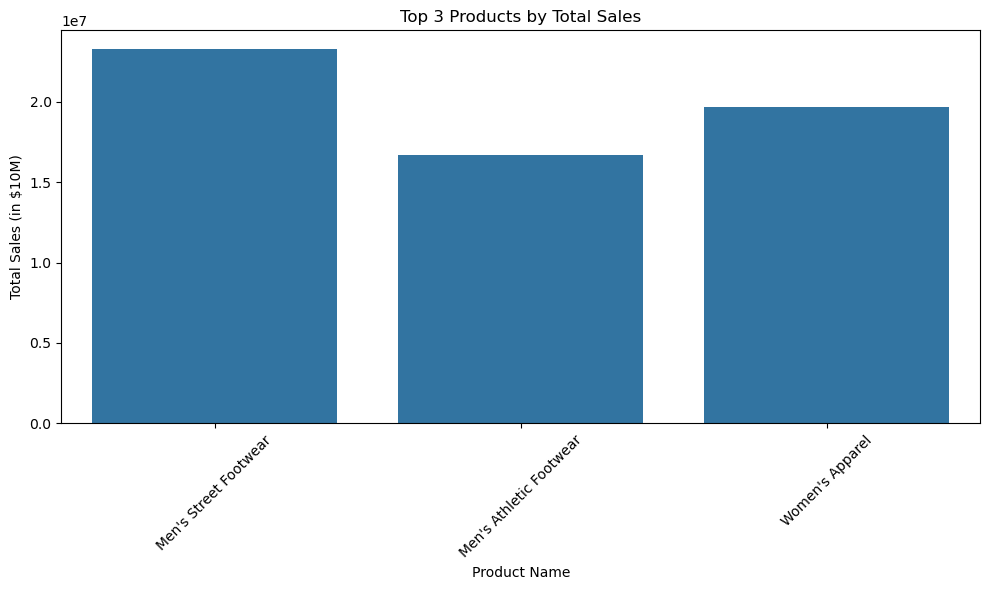

In [64]:
# Group and sum the sales by product
top_products = (
    rush_sales_2021
    .groupby('PRODUCT_NAME', as_index=False)['SALES_TOTAL']
    .sum()
    .sort_values(by='SALES_TOTAL', ascending=False)
    .head(3)
)

# Filter original dataset for only the top 3 products
filtered_data = rush_sales_2021[rush_sales_2021['PRODUCT_NAME'].isin(top_products['PRODUCT_NAME'])]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_data,
    x='PRODUCT_NAME',
    y='SALES_TOTAL',
    estimator='sum',
    errorbar=None
)

# Format the plot
plt.title('Top 3 Products by Total Sales')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (in $10M)')
plt.xlabel('Product Name')
plt.tight_layout()
plt.show()

### 2. What state had the highest sales (in dollars) of women's products in 2021? How much was it?

In [41]:
# Create a GENDER column to identify if the product is for Men or Women (0 = Men, 1 = Women).
rush_sales_2021.loc[rush_sales_2021['PRODUCT_NAME'].str.contains("Men's", case=False, na=False), 'GENDER'] = 0
rush_sales_2021.loc[rush_sales_2021['PRODUCT_NAME'].str.contains("Women's", case=False, na=False), 'GENDER'] = 1

In [42]:
# Filter for rows where GENDER == 1 (Women's).
womens_products = rush_sales_2021[rush_sales_2021['GENDER'] == 1]

# Group by STATE and sum the SALES_TOTAL column, and return the top results.
womens_products.groupby('STATE')['SALES_TOTAL'].sum().sort_values(ascending = False).head(5)

STATE
Maine            2176301.0
Delaware         2023575.0
New Hampshire    1916400.0
Arizona          1798900.0
Missouri         1771992.0
Name: SALES_TOTAL, dtype: float64

+ The state with the highest sales (in dollars) for women's products in 2021 was ``Maine``.
+ The amount of sales was ``$2,176,301.00``.

### 3. What state had the highest sales (in dollars) of men's products in 2021? How much was it?

In [43]:
# Filter for rows where GENDER == 0 (Men's).
mens_products = rush_sales_2021[rush_sales_2021['GENDER'] == 0]

# Group by STATE and sum the SALES_TOTAL column, and return the results.
mens_products.groupby('STATE')['SALES_TOTAL'].sum().sort_values(ascending = False).head(5)

STATE
Delaware         2334300.0
Arizona          2261025.0
New Hampshire    2232000.0
Maine            2217190.0
New York         2114999.0
Name: SALES_TOTAL, dtype: float64

+ The state with the highest sales (in dollars) for men's products in 2021 was ``Delaware``.
+ The amount of sales was ``$2,334,300.00``.

### 4. What retailer purchased the most units in 2021? In 2020?

In [44]:
# Filter the results to only be results from the year 2020 and save to a df called rush_sales_2020.
rush_sales_2020 = rush_sales_df[rush_sales_df['YEAR'] == 2020].copy()

# Add a column to rush_sales_2020 caled sales_total that is the product of PRICE_PER_UNIT and UNITS_SOLD.
rush_sales_2020.loc[:, 'SALES_TOTAL'] = rush_sales_2020['PRICE_PER_UNIT'] * rush_sales_2020['UNITS_SOLD']

# Create a GENDER column to identify if the product is for Men or Women (0 = Men, 1 = Women).
rush_sales_2020.loc[rush_sales_2020['PRODUCT_NAME'].str.contains("Men's", case=False, na=False), 'GENDER'] = 0
rush_sales_2020.loc[rush_sales_2020['PRODUCT_NAME'].str.contains("Women's", case=False, na=False), 'GENDER'] = 1

In [45]:
# Group the rush_sales_2021 df by RETAILER and sum UNITS_SOLD, and then return the results.
rush_sales_2021.groupby('RETAILER')['UNITS_SOLD'].sum().sort_values(ascending = False).head(5)

RETAILER
Foot Locker      1097410
West Gear         315502
Sports Direct     256517
Amazon            205570
Kohl's            136950
Name: UNITS_SOLD, dtype: int64

In [46]:
# Group the rush_sales_2020 df by RETAILER and sum UNITS_SOLD, and then return the Results.
rush_sales_2020.groupby('RETAILER')['UNITS_SOLD'].sum().sort_values(ascending = False).head(5)

RETAILER
Amazon           317930
Kohl's            68686
West Gear         57334
Sports Direct     18399
Name: UNITS_SOLD, dtype: int64

+ The retailer who purchased the most units in 2021 was ``Foot Locker``.
+ The retailer who purchased the most units in 2020 was ``Amazon``.

## Determine Any Additional Trends or Insights

### What product had the lowest sales in 2021? How much sold?

In [47]:
# Determine which product had the lowest sales in 2021.
rush_sales_2021.groupby('PRODUCT_NAME')['SALES_TOTAL'].sum().sort_values(ascending = True).head(5)

PRODUCT_NAME
Women's Athletic Footwear    11381041.0
Men's Apparel                13325861.0
Women's Street Footwear      13807909.0
Men's Athletic Footwear      16702706.0
Women's Apparel              19658904.0
Name: SALES_TOTAL, dtype: float64

### What state had the lowest sales of women's products in 2021?

In [48]:
# Deterimne which state had the lowest sales of women's products in 2021?
womens_products.groupby('STATE')['SALES_TOTAL'].sum().sort_values(ascending = True).head(5)

STATE
Ohio         12153.0
Kentucky    114625.0
Colorado    183279.0
Vermont     190801.0
Oklahoma    258606.0
Name: SALES_TOTAL, dtype: float64

### What state had the lowest sales of men's products in 2021?

In [49]:
# Determine which state had the lowest sales of men's products in 2021.
mens_products.groupby('STATE')['SALES_TOTAL'].sum().sort_values(ascending = True).head(5)

STATE
Ohio               17367.0
Kentucky          219325.0
Vermont           246522.0
Colorado          253593.0
North Carolina    325320.0
Name: SALES_TOTAL, dtype: float64

### What region had the highest sales in 2021? The lowest?

In [50]:
# Determine which region had the highest sales in 2021.
rush_sales_2021.groupby('REGION')['SALES_TOTAL'].sum().sort_values(ascending = False).head(5)

REGION
Northeast    32239400.0
Midwest      24799271.0
West         20951383.0
South        10176914.0
Southeast     9998063.0
Name: SALES_TOTAL, dtype: float64

In [51]:
# Determine which region had the lowest sales in 2021.
rush_sales_2021.groupby('REGION')['SALES_TOTAL'].sum().sort_values(ascending = True).head(5)

REGION
Southeast     9998063.0
South        10176914.0
West         20951383.0
Midwest      24799271.0
Northeast    32239400.0
Name: SALES_TOTAL, dtype: float64

### What retailer purchased the least units in 2021? 2020?

In [52]:
# Determine which retailer purchased the least units in 2021.
rush_sales_2021.groupby('RETAILER')['UNITS_SOLD'].sum().sort_values(ascending = True).head(5)

RETAILER
Walmart           58286
Kohl's           136950
Amazon           205570
Sports Direct    256517
West Gear        315502
Name: UNITS_SOLD, dtype: int64

In [53]:
# Determine which retailer purchased the least units in 2020.
rush_sales_2020.groupby('RETAILER')['UNITS_SOLD'].sum().sort_values(ascending = True).head(5)

RETAILER
Sports Direct     18399
West Gear         57334
Kohl's            68686
Amazon           317930
Name: UNITS_SOLD, dtype: int64

### What product had the least units sold in 2021? 2020?

In [54]:
# Determine which product had the least units sold in 2021.
rush_sales_2021.groupby('PRODUCT_NAME')['UNITS_SOLD'].sum().sort_values(ascending = True).head(5)


PRODUCT_NAME
Men's Apparel                251656
Women's Athletic Footwear    258860
Women's Street Footwear      324294
Men's Athletic Footwear      362778
Women's Apparel              363672
Name: UNITS_SOLD, dtype: int64

In [55]:
# Determine which product had the least units sold in 2020.
rush_sales_2020.groupby('PRODUCT_NAME')['UNITS_SOLD'].sum().sort_values(ascending = True).head(5)


PRODUCT_NAME
Men's Apparel                61227
Women's Athletic Footwear    64177
Women's Street Footwear      75791
Women's Apparel              80208
Men's Athletic Footwear      81760
Name: UNITS_SOLD, dtype: int64

### What retailer, including region, state, city had the highest operating marign? The lowest?

In [56]:
# Determine the retailer with the highest operting margin.  Group by region, state, and city.
rush_sales_2021.groupby(['RETAILER', 'REGION', 'STATE', 'CITY'])['OPERATING_MARGIN'].sum().sort_values(ascending = False).head(5)

RETAILER       REGION  STATE      CITY       
Sports Direct  South   Texas      Dallas         105.72
                       Tennessee  Knoxville      102.35
Walmart        South   Arkansas   Little Rock    100.77
West Gear      South   Arkansas   Little Rock    100.77
Sports Direct  South   Alabama    Birmingham      98.35
Name: OPERATING_MARGIN, dtype: float64

In [57]:
# Determine the retailer with the lowest operting margin.  Group by region, state, and city.
rush_sales_2021.groupby(['RETAILER', 'REGION', 'STATE', 'CITY'])['OPERATING_MARGIN'].sum().sort_values(ascending = True).head(5)

RETAILER       REGION     STATE       CITY         
Kohl's         South      Oklahoma    Oklahoma City    0.40
               Midwest    Kansas      Wichita          0.40
Sports Direct  Southeast  Florida     Orlando          0.55
Kohl's         Midwest    Minnesota   Minneapolis      2.95
Foot Locker    West       Washington  Seattle          2.95
Name: OPERATING_MARGIN, dtype: float64

### Using a bar chart show the relationship between region and product type.

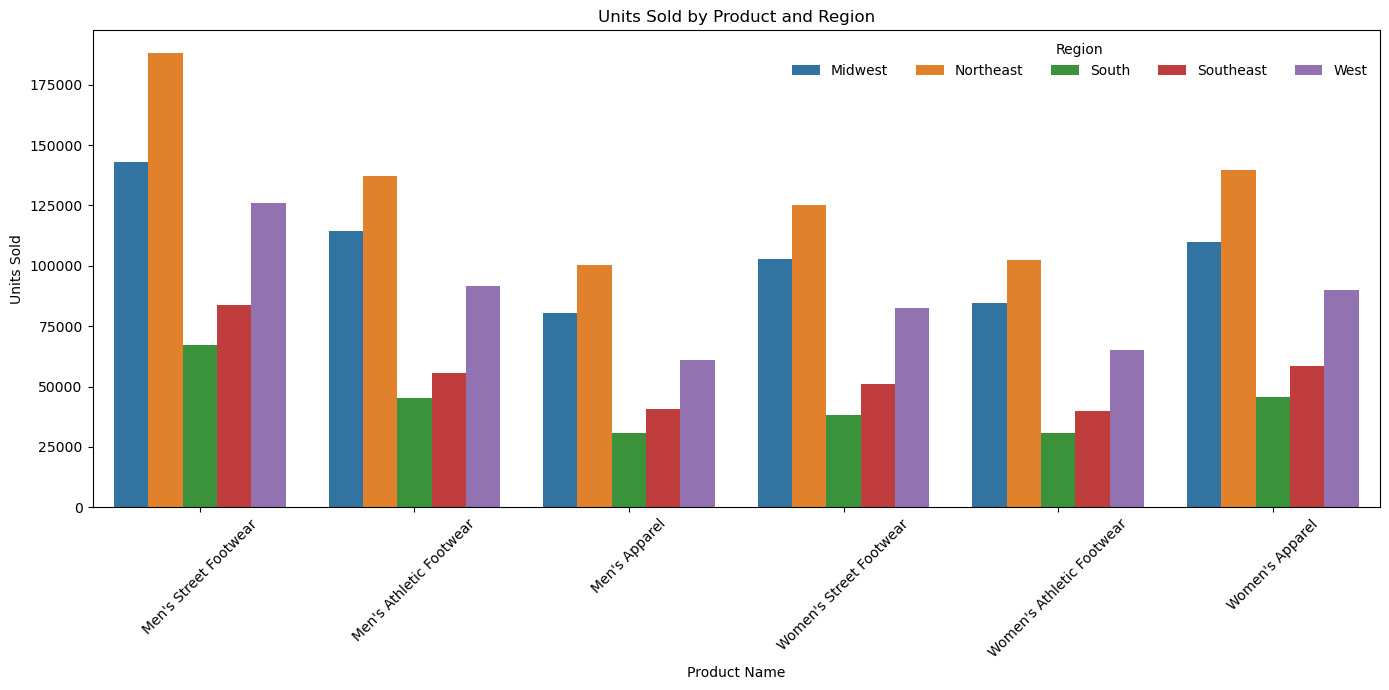

In [58]:
# Create a grouped bar chart using seaborn to show the total units sold by product and region.
plt.figure(figsize = (14, 7))
sns.barplot(
    data = rush_sales_df,
    x = 'PRODUCT_NAME',
    y = 'UNITS_SOLD',
    hue = 'REGION',
    estimator = 'sum',
    errorbar = None
)

# Format the plot
plt.title('Units Sold by Product and Region')
plt.xticks(rotation = 45)
plt.ylabel('Units Sold')
plt.xlabel('Product Name')

# Move legend to top, in a horizontal row
plt.legend(
    title = 'Region',
    loc = 'upper right',
    ncol = 5,
    frameon = False
)
plt.tight_layout()
plt.show()

### Using a bar chart show the relationship between product type and retailer.

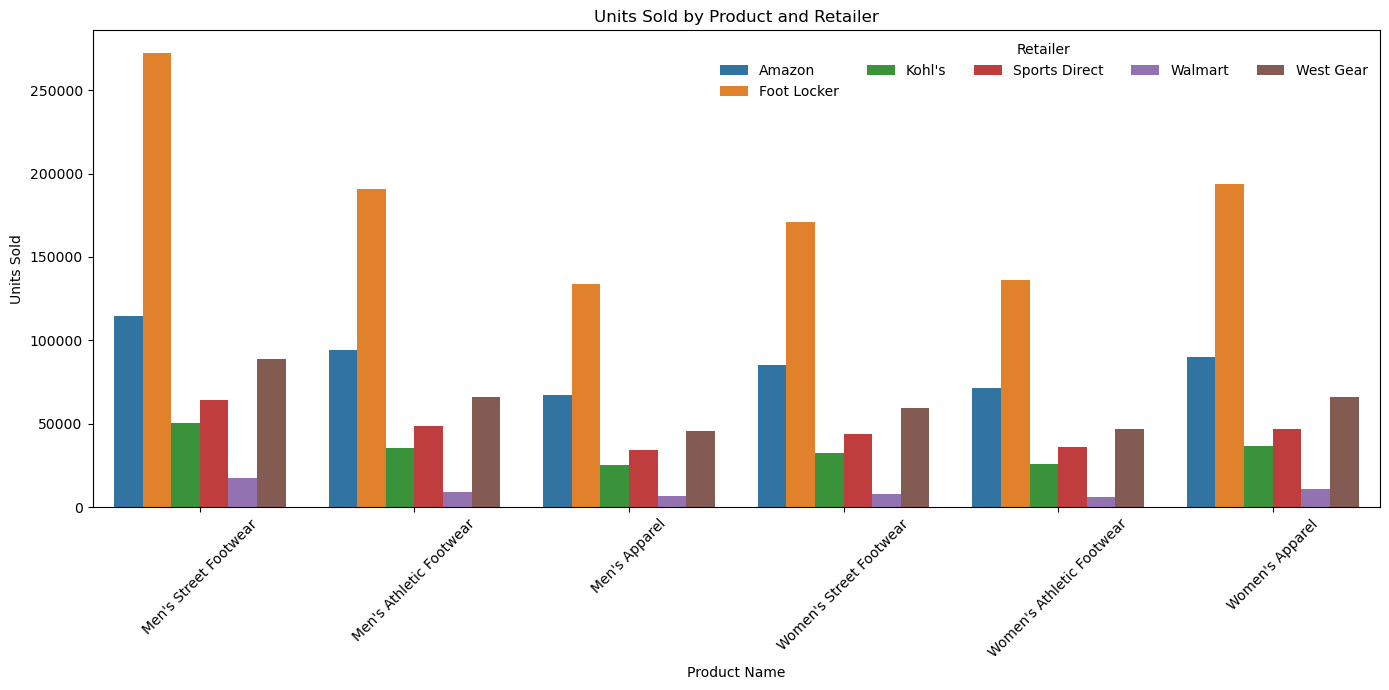

In [59]:
# Create a grouped bar chart using seaborn to show the total units sold by product and retailer.
plt.figure(figsize = (14, 7))
sns.barplot(
    data = rush_sales_df,
    x = 'PRODUCT_NAME',
    y = 'UNITS_SOLD',
    hue = 'RETAILER',
    estimator = 'sum',
    errorbar = None
)

# Format the plot
plt.title('Units Sold by Product and Retailer')
plt.xticks(rotation = 45)
plt.ylabel('Units Sold')
plt.xlabel('Product Name')

# Move legend to top, in a horizontal row
plt.legend(
    title = 'Retailer',
    loc = 'upper right',
    ncol = 5,
    frameon = False
)
plt.tight_layout()
plt.show()

### Create two line charts showing the sales for each retailer for 2021 and 2020.

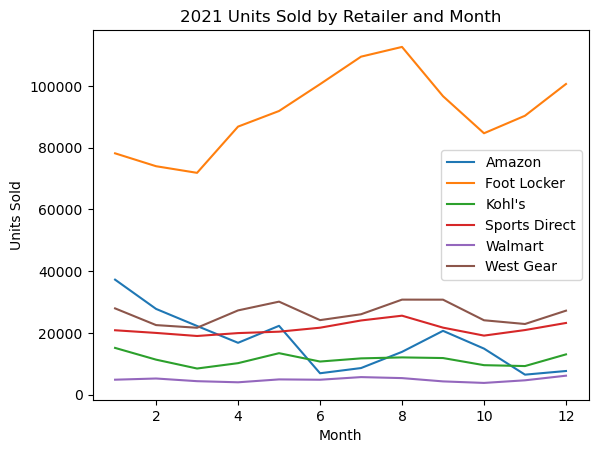

In [60]:
# Aggregate the total sales by retailer and month for 2021.
sales_trend_2021 = rush_sales_2021.groupby(['RETAILER', 'MONTH'])['UNITS_SOLD'].sum().sort_values(ascending = False).reset_index()

# Pviot the data to have months as index and retialers as columns
trend_pivot_2021 = sales_trend_2021.pivot(index = 'MONTH', columns = 'RETAILER', values = 'UNITS_SOLD')

# Sort by month
trend_pivot_2021.sort_index()

# Plot the trends
plt.figure()
for retailer in trend_pivot_2021.columns:
  plt.plot(trend_pivot_2021.index, trend_pivot_2021[retailer], label = retailer)

plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('2021 Units Sold by Retailer and Month')
plt.legend()
plt.show()

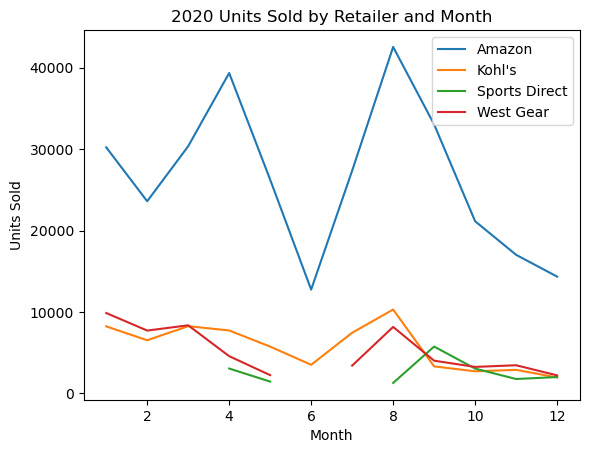

In [61]:
# Aggregate the total sales by retailer and month for 2020.
sales_trend_2020 = rush_sales_2020.groupby(['RETAILER', 'MONTH'])['UNITS_SOLD'].sum().sort_values(ascending = False).reset_index()

# Pviot the data to have months as index and retialers as columns
trend_pivot_2020 = sales_trend_2020.pivot(index = 'MONTH', columns = 'RETAILER', values = 'UNITS_SOLD')

# Sort by month
trend_pivot_2020.sort_index()

# Plot the trends
plt.figure()
for retailer in trend_pivot_2020.columns:
  plt.plot(trend_pivot_2020.index, trend_pivot_2020[retailer], label = retailer)

plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('2020 Units Sold by Retailer and Month')
plt.legend()
plt.show()

### Create a box plot to show the relationship between price_per_unit and region for the produt types.

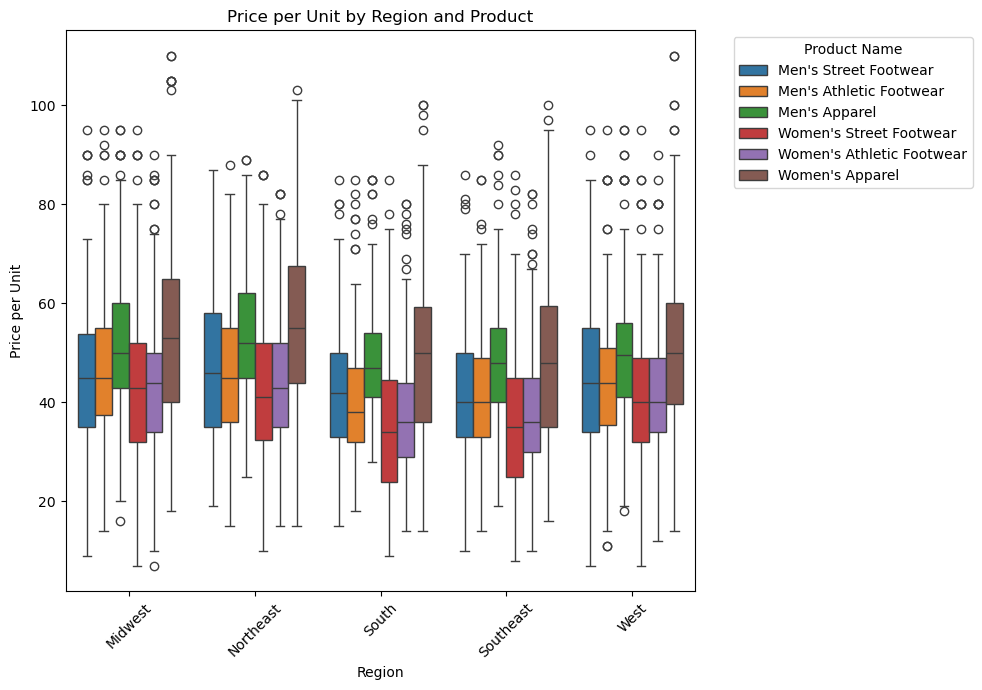

In [70]:
# Create a grouped boxplot using seaborn to show the price per unit by region and product.
plt.figure(figsize = (10, 7))

sns.boxplot(
    data = rush_sales_df,
    x = 'REGION',
    y = 'PRICE_PER_UNIT',
    hue = 'PRODUCT_NAME'
)

plt.title('Price per Unit by Region and Product')
plt.xlabel('Region')
plt.ylabel('Price per Unit')
plt.xticks(rotation = 45)
plt.legend(title = 'Product Name', bbox_to_anchor = (1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Create a bar graph showing the sales volume for each of the product types.

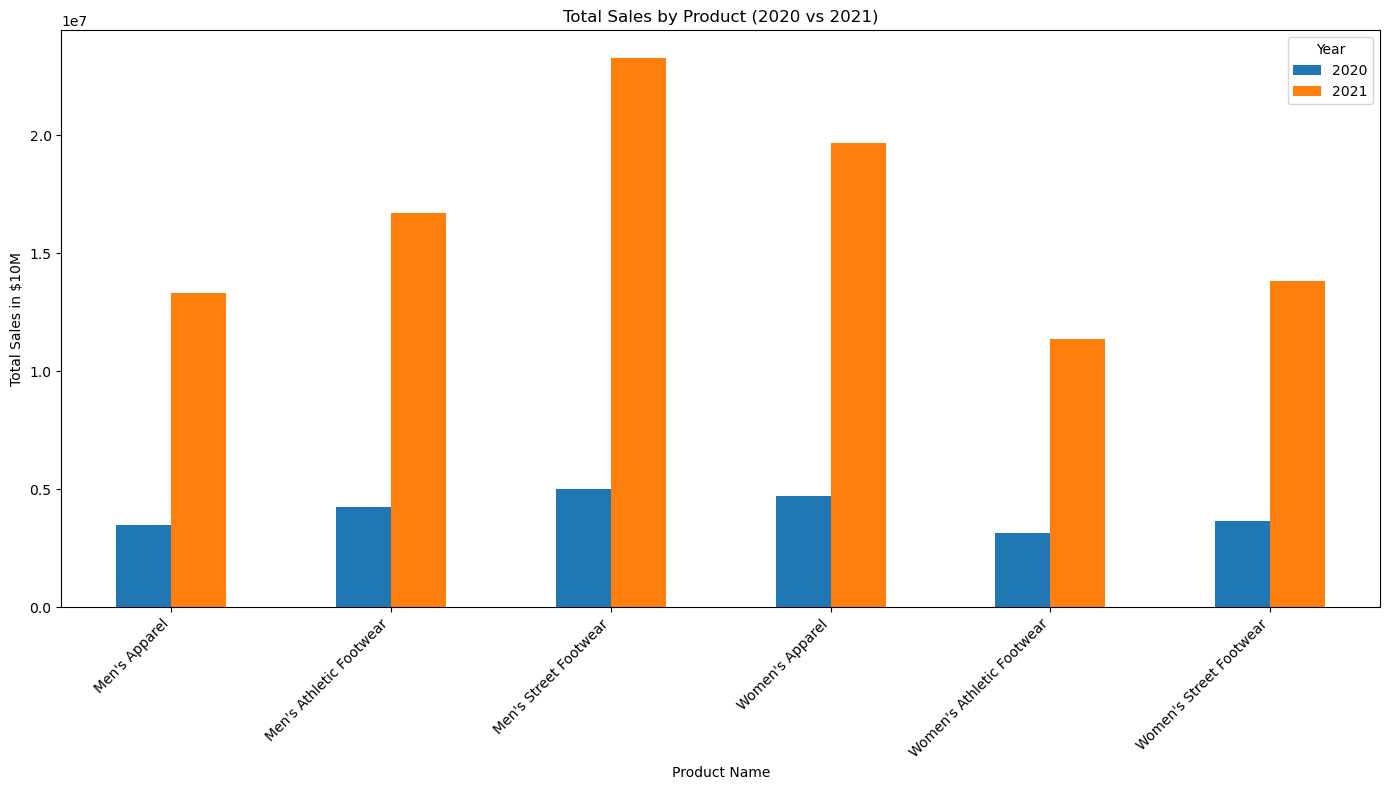

In [63]:
# Add total_sales to rush_sales_df.
rush_sales_with_total = rush_sales_df.copy()

rush_sales_with_total['TOTAL_SALES'] = rush_sales_with_total['PRICE_PER_UNIT'] * rush_sales_with_total['UNITS_SOLD']

# Group by PRODUCT_NAME and YEAR, summing SALES_TOTAL
sales_summary = rush_sales_with_total.groupby(['PRODUCT_NAME', 'YEAR'])['TOTAL_SALES'].sum().reset_index()

# Pivot so each YEAR is a separate column
sales_pivot = sales_summary.pivot(index = 'PRODUCT_NAME', columns = 'YEAR', values = 'TOTAL_SALES').fillna(0)

# Plot the grouped bar chart
sales_pivot.plot(kind = 'bar', figsize = (14, 8))

# Formatting
plt.title('Total Sales by Product (2020 vs 2021)')
plt.xlabel('Product Name')
plt.ylabel('Total Sales in $10M')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Year')
plt.tight_layout()
plt.show()

### Create a bar graph showing the comparison between retailers for 2021 and 2020.

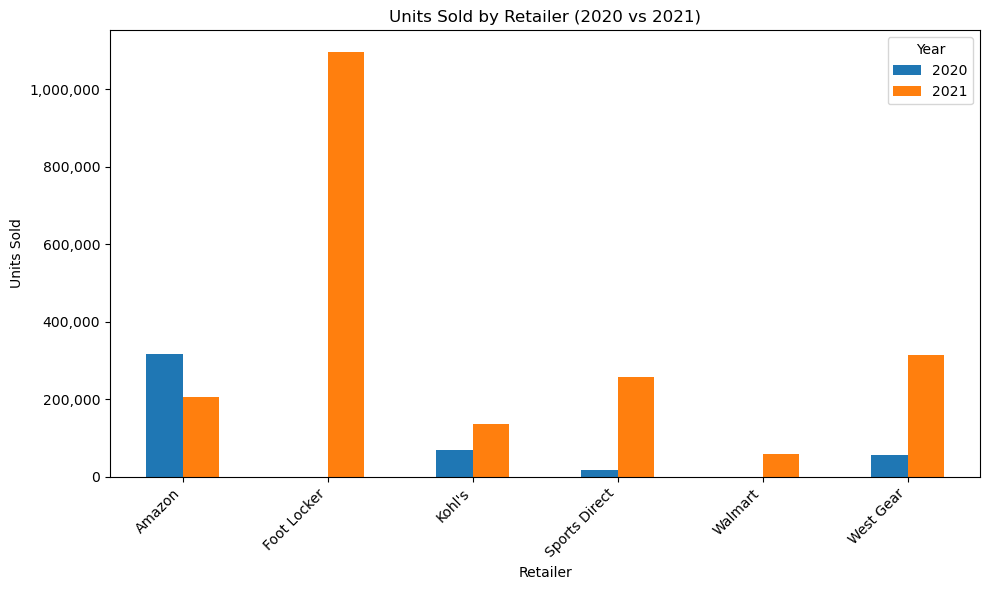

In [69]:
# Group by RETAILER and YEAR, summing UNITS_SOLD
sales_summary = rush_sales_with_total.groupby(['RETAILER', 'YEAR'])['UNITS_SOLD'].sum().reset_index()

# Pivot so each YEAR is a separate column
sales_pivot = sales_summary.pivot(index = 'RETAILER', columns = 'YEAR', values = 'UNITS_SOLD').fillna(0)

# Plot the grouped bar chart
ax = sales_pivot.plot(kind = 'bar', figsize = (10, 6))

# Formatting
plt.title('Units Sold by Retailer (2020 vs 2021)')
plt.xlabel('Retailer')
plt.ylabel('Units Sold')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Year')

# Show full integer values on y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()